In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from scipy.stats import chi2_contingency
%matplotlib inline

In [150]:
df = pd.read_csv("application_train.csv", low_memory = False)

In [151]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
df.describe()
##df.info()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [153]:
Nulldf = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100 * df.isnull().sum()/len(df)})
Nulldf[Nulldf['Count']>0]

,Count,Percent
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [154]:
df1 = df.dropna(axis = 1, thresh = int(0.60 * len(df)))

In [155]:
uniquedf = pd.DataFrame({'UniqueCount': df1.nunique(), 'DataType': df1.dtypes})
uniquedf[uniquedf['UniqueCount'] == 1]

,UniqueCount,DataType


In [156]:
df1.shape

(307511, 73)

In [157]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
high_cardinality = [col for col in df1.columns if df1[col].nunique() > 0.9 * len(df1)]
df1.drop(high_cardinality, axis=1)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df1 = df.drop(columns = ['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','SK_ID_CURR',], axis = 1) 

In [160]:
contingency_table = pd.crosstab(df['NAME_FAMILY_STATUS'], df['NAME_TYPE_SUITE'])

# Chi-square test
chi2 = chi2_contingency(contingency_table)[0]
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print("Cramér’s V:", cramers_v)

# No correlation found between the two categorical variables

Cramér’s V: 0.06770296179950049


In [161]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].replace(365243, np.nan)
df1[df1['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].value_counts()
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].abs()
df1['YEARS_EMPLOYED'] = df1['DAYS_EMPLOYED'] / 365
df1['IS_EMPLOYED'] = np.where(df1['DAYS_EMPLOYED'].isna(), 0, 1)

In [162]:
df1['DAYS_REGISTRATION'] = df1['DAYS_REGISTRATION'].abs()
df1['DAYS_REGISTRATION'] = df1['DAYS_REGISTRATION'] / 365
df1['DAYS_REGISTRATION'].head()

0     9.994521
1     3.249315
2    11.671233
3    26.939726
4    11.810959
Name: DAYS_REGISTRATION, dtype: float64

In [163]:
df1['DAYS_ID_PUBLISH'] = df1['DAYS_ID_PUBLISH'].abs()
df1['YEARS_ID_PUBLISH'] = df1['DAYS_ID_PUBLISH'] / 365
df1[['DAYS_ID_PUBLISH', 'TARGET']].corr() # correlation is -0.05
df1 = df1.drop(columns = ['DAYS_ID_PUBLISH'], axis = 1)

In [164]:
for col in df1.columns:
    if 'DAYS_' in col:
        df1[col] = df1[col].replace(365243, np.nan).abs()

In [165]:
corr = df1.corr(numeric_only=True).abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df1.drop(columns=to_drop, inplace=True)
# Dropped columns with correlation greater than 0.9

In [166]:
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2]
for col in binary_cols:
    df1[col] = df1[col].map(lambda x: 1 if x in ['Y', 'Yes', 'True', 1] else 0)
df1.replace(['XNA', 'Unknown', 'NONE'], np.nan, inplace=True)
# Converted binary categorical variables to 0 and 1

In [167]:
for col in df1.select_dtypes(include='object'):
    try:
        df1[col] = pd.to_numeric(df1[col])
    except:
        continue
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  int64  
 2   CODE_GENDER                  307507 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  int64  
 4   FLAG_OWN_REALTY              307511 non-null  int64  
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307509 non-null  object 
 13 

In [168]:
print("Remaining columns:", df1.shape[1])
df1.head(15)

Remaining columns: 83


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_ID_PUBLISH
0,1,0,M,0,1,0,202500.000,406597.5,24700.5,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,5.808219
1,0,0,F,0,0,0,270000.000,1293502.5,35698.5,Family,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.797260
2,0,0,M,1,1,0,67500.000,135000.0,6750.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.934247
3,0,0,F,0,1,0,135000.000,312682.5,29686.5,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6.676712
4,0,0,M,0,1,0,121500.000,513000.0,21865.5,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,9.473973
5,0,0,M,0,1,0,99000.000,490495.5,27517.5,"Spouse, partner",...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.306849
6,0,0,F,1,1,1,171000.000,1560726.0,41301.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1.695890
7,0,0,M,1,1,0,360000.000,1530000.0,42075.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.517808
8,0,0,F,0,1,0,112500.000,1019610.0,33826.5,Children,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,9.627397
9,0,0,M,0,1,0,135000.000,405000.0,20250.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10.936986


In [169]:
flag_cols = [col for col in df1.columns if 'FLAG_' in col]

for col in flag_cols:
    print(f"{col}: {df1[col].value_counts(normalize=True).to_dict()}")


FLAG_OWN_CAR: {0: 0.6598918412674668, 1: 0.34010815873253314}
FLAG_OWN_REALTY: {1: 0.6936727466659729, 0: 0.30632725333402705}
FLAG_MOBIL: {1: 0.9999967480838083, 0: 3.2519161916159095e-06}
FLAG_EMP_PHONE: {1: 0.8198893698111612, 0: 0.18011063018883877}
FLAG_WORK_PHONE: {0: 0.8006315221244118, 1: 0.1993684778755882}
FLAG_CONT_MOBILE: {1: 0.9981334001060125, 0: 0.0018665998939875323}
FLAG_PHONE: {0: 0.7189336316424453, 1: 0.28106636835755466}
FLAG_EMAIL: {0: 0.9432800777858353, 1: 0.0567199222141647}
FLAG_DOCUMENT_2: {0: 0.999957725089509, 1: 4.2274910491006824e-05}
FLAG_DOCUMENT_3: {1: 0.7100233812774177, 0: 0.2899766187225823}
FLAG_DOCUMENT_4: {0: 0.9999187020952096, 1: 8.129790479039775e-05}
FLAG_DOCUMENT_5: {0: 0.9848850935413692, 1: 0.015114906458630749}
FLAG_DOCUMENT_6: {0: 0.9119446133634244, 1: 0.0880553866365756}
FLAG_DOCUMENT_7: {0: 0.9998081369446946, 1: 0.00019186305530533867}
FLAG_DOCUMENT_8: {0: 0.9186240492210035, 1: 0.08137595077899652}
FLAG_DOCUMENT_9: {0: 0.99610420440

In [170]:
for col in flag_cols:
    if df1[col].nunique() == 1 or df1[col].value_counts(normalize=True).iloc[0] > 0.95:
            df1.drop(col, axis=1, inplace=True)


In [171]:
print("Remaining columns:", df1.shape[1])

Remaining columns: 68


In [172]:
missing = df1.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Remaining missing values:\n", missing)

# Separate numerical and categorical columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df1.select_dtypes(include=['object']).columns

# Impute missing values
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].median())   # Median for numeric
df1[cat_cols] = df1[cat_cols].fillna(df1[cat_cols].mode().iloc[0])   # Mode for categorical


Remaining missing values:
 COMMONAREA_AVG                 214865
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
FLOORSMIN_AVG                  208642
YEARS_BUILD_AVG                204488
OWN_CAR_AGE                    202929
LANDAREA_AVG                   182590
BASEMENTAREA_AVG               179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_AVG              169682
ELEVATORS_AVG                  163891
WALLSMATERIAL_MODE             156341
APARTMENTS_AVG                 156061
ENTRANCES_AVG                  154828
HOUSETYPE_MODE                 154297
FLOORSMAX_AVG                  153020
YEARS_BEGINEXPLUATATION_AVG    150007
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
ORGANIZATION_TYPE               55374
DAYS_EMPLOYED                   55374
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_Q

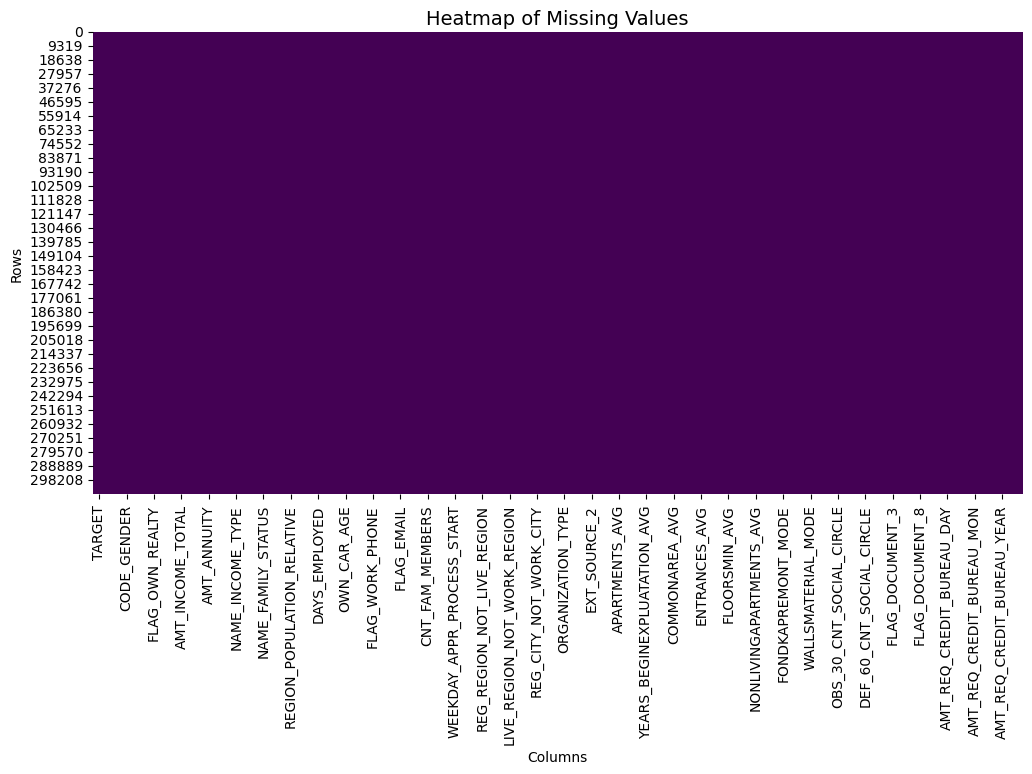

In [173]:
df1.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values', fontsize=14)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# no missing values remain

In [174]:
# Identify numeric columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((df1[col] < lower_bound) | (df1[col] > upper_bound)).sum()
    if outliers > 0:
        outlier_summary[col] = outliers

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])
outlier_df = outlier_df.sort_values(by='Outlier_Count', ascending=False)

print("Columns with Outliers:\n")
print(outlier_df)


Columns with Outliers:

                         Column  Outlier_Count
23               APARTMENTS_AVG         150931
25  YEARS_BEGINEXPLUATATION_AVG         142016
34            NONLIVINGAREA_AVG         137430
21                 EXT_SOURCE_1         134131
24             BASEMENTAREA_AVG         127483
32                 LANDAREA_AVG         124811
29                ENTRANCES_AVG         118676
26              YEARS_BUILD_AVG         100405
8                   OWN_CAR_AGE          99562
30                FLOORSMAX_AVG          92616
27               COMMONAREA_AVG          92540
13         REGION_RATING_CLIENT          80527
19       REG_CITY_NOT_WORK_CITY          70867
31                FLOORSMIN_AVG          65994
10              FLAG_WORK_PHONE          61308
28                ELEVATORS_AVG          57902
9                FLAG_EMP_PHONE          55386
20      LIVE_CITY_NOT_WORK_CITY          55215
46    AMT_REQ_CREDIT_BUREAU_QRT          50575
45    AMT_REQ_CREDIT_BUREAU_MON     

In [175]:
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Capping outliers using IQR
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
    df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])

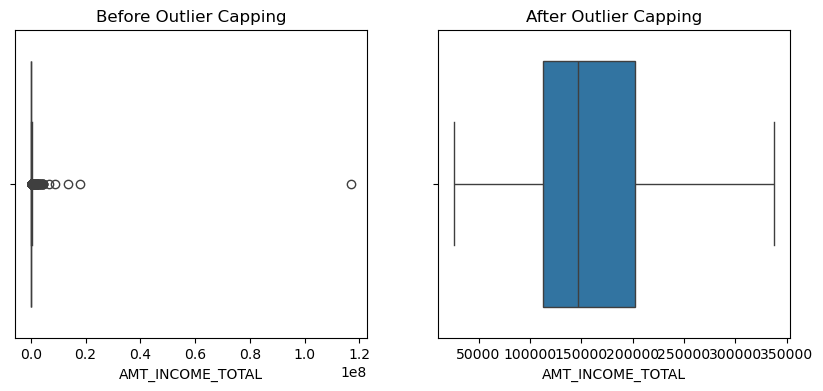

In [176]:
col = 'AMT_INCOME_TOTAL'  # example numeric column

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title("Before Outlier Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df1['AMT_INCOME_TOTAL'])
plt.title("After Outlier Capping")
plt.show()
# Outlier capping visualization - To check outlier reduction 
# Before capping, the column had many extreme income outliers — some potentially erroneous or rare cases that would bias models.
# After capping, the boxplot shows a more reasonable distribution, indicating successful mitigation of outliers.

DATATYPE CONVERSION

In [177]:

print("Before conversion:")
print(df1.dtypes.value_counts())
for col in df1.columns:
    if ('FLAG_' in col) or ('NAME_' in col) or ('TYPE_' in col) or ('ORGANIZATION_' in col):
        df1[col] = df1[col].astype('category')


print("\n After conversion:")
print(df1.dtypes.value_counts())


Before conversion:
float64    56
object     12
Name: count, dtype: int64

 After conversion:
float64     46
category     5
object       5
category     4
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [178]:
manual_cat_cols = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
]

for col in manual_cat_cols:
    if col in df1.columns:
        df1[col] = df1[col].astype('category')

print([col for col in manual_cat_cols if col in df1.columns])


['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


ENCODING

In [179]:
cat_cols = df1.select_dtypes(include='category').columns
print("📋 Total categorical columns:", len(cat_cols))
print(cat_cols.tolist())
# no of categorical columns identified

📋 Total categorical columns: 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']


In [ ]:
'''le = LabelEncoder()
binary_cols = [col for col in cat_cols if df1[col].nunique() == 2]
for col in binary_cols:
    df1[col] = le.fit_transform(df1[col])
print(binary_cols)

multi_class_cols = [col for col in cat_cols if df1[col].nunique() > 2]
df1 = pd.get_dummies(df1, columns=multi_class_cols, drop_first=True)
print(multi_class_cols)

print(df1.info())
print("\nRemaining categorical columns:", df1.select_dtypes(include='category').columns.tolist())
'''


'le = LabelEncoder()\nbinary_cols = [col for col in cat_cols if df1[col].nunique() == 2]\nfor col in binary_cols:\n    df1[col] = le.fit_transform(df1[col])\nprint(binary_cols)'

In [183]:
print("Remaining columns:", df1.shape[1])
df1.columns

Remaining columns: 68


Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 

In [ ]:
le = LabelEncoder()
binary_cols = [col for col in cat_cols if df1[col].nunique() == 2]
print(" Binary columns:", binary_cols)

for col in binary_cols:
    df1[col] = le.fit_transform(df1[col])
# label encoding applied    

 Binary columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_DOCUMENT_3']


In [188]:
df1.shape[1]

68

In [189]:
multi_class_cols = [col for col in cat_cols if df1[col].nunique() > 2]
print(" Multi-class columns:", multi_class_cols)
df1 = pd.get_dummies(df1, columns=multi_class_cols, drop_first=True)
# one - hot encoding applied ( do not run this block again)


 Multi-class columns: ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [190]:
df1.shape[1]

173

In [197]:
print("\nRemaining categorical columns:", df1.select_dtypes(include='category').columns.tolist())
print("Final shape:", df1.shape)



Remaining categorical columns: []
Final shape: (307511, 166)


In [192]:
df1 = df1.drop(columns = ['NAME_CONTRACT_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8'], axis = 1)

In [193]:
df1.shape[1]

166

In [194]:
df1.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'FONDKAPREMONT_MODE_reg oper account',
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden'],
      dtype='object', length=166)

In [ ]:
duplicate_count = df1.duplicated().sum()
print(f" Number of duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df1.drop_duplicates(inplace=True)
    print("Duplicate rows removed successfully")
else:
    print("No duplicate rows found")
df1.shape


 Number of duplicate rows found: 0
No duplicate rows found.


(307511, 166)

In [ ]:
scaler = StandardScaler()

# Identify feature columns (exclude TARGET)
feature_cols = [col for col in df1.columns if col != 'TARGET']


df1[feature_cols] = scaler.fit_transform(df1[feature_cols])

print("Feature scaling applied successfully (TARGET not affected).")
print("Scaled dataset shape:", df1.shape)


Feature scaling applied successfully (TARGET not affected).
Scaled dataset shape: (307511, 166)


In [200]:
df1.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CODE_GENDER,307511.0,3.706243e-17,1.000002,-0.720370,-0.720370,-0.720370,1.388176,1.388176
FLAG_OWN_CAR,307511.0,-9.260987e-17,1.000002,-0.717914,-0.717914,-0.717914,1.392925,1.392925
FLAG_OWN_REALTY,307511.0,6.146264e-17,1.000002,-1.504820,-1.504820,0.664531,0.664531,0.664531
CNT_CHILDREN,307511.0,-9.427352e-17,1.000002,-0.595920,-0.595920,-0.595920,0.866621,3.060433
AMT_INCOME_TOTAL,307511.0,-1.830015e-17,1.000002,-1.868640,-0.683832,-0.211137,0.543948,2.385618
AMT_CREDIT,307511.0,-1.274772e-16,1.000002,-1.439102,-0.847488,-0.207149,0.568835,2.693321
AMT_ANNUITY,307511.0,-1.221859e-16,1.000002,-1.896066,-0.773545,-0.142656,0.587169,2.628240
REGION_POPULATION_RELATIVE,307511.0,7.865369e-17,1.000002,-1.627562,-0.842555,-0.128002,0.664842,2.925938
DAYS_BIRTH,307511.0,-3.327301e-17,1.000002,-1.958761,-0.830433,-0.065765,0.835248,2.106335


FEATURE VALIDATION

In [ ]:
print("Dataset Shape:", df1.shape)

missing_values = df1.isnull().sum()
total_missing = missing_values.sum()
print("Total Missing Values:", total_missing)
if total_missing == 0:
    print("No missing values remain in the dataset.")
else:
    print("Missing values still present in these columns:")
    print(missing_values[missing_values > 0])

duplicate_count = df1.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")
if duplicate_count == 0:
    print("No duplicate rows found.")
else:
    print(f"{duplicate_count} duplicate rows exist. Consider removing them.")

print("\n Data Types Summary:")
print(df1.dtypes.value_counts())

desc = df1.describe().T[['mean', 'std', 'min', 'max']]
print("\n Feature Scaling Validation (sample):")
print(desc.head(10))

print("\n TARGET value distribution:")
print(df1['TARGET'].value_counts(normalize=True))

# Preprocessing Done 

Dataset Shape: (307511, 166)
Total Missing Values: 0
No missing values remain in the dataset.

 Duplicate Rows: 0
No duplicate rows found.

 Data Types Summary:
float64    166
Name: count, dtype: int64

 Feature Scaling Validation (sample):
                                    mean       std       min       max
TARGET                      0.000000e+00  0.000000  0.000000  0.000000
CODE_GENDER                 3.706243e-17  1.000002 -0.720370  1.388176
FLAG_OWN_CAR               -9.260987e-17  1.000002 -0.717914  1.392925
FLAG_OWN_REALTY             6.146264e-17  1.000002 -1.504820  0.664531
CNT_CHILDREN               -9.427352e-17  1.000002 -0.595920  3.060433
AMT_INCOME_TOTAL           -1.830015e-17  1.000002 -1.868640  2.385618
AMT_CREDIT                 -1.274772e-16  1.000002 -1.439102  2.693321
AMT_ANNUITY                -1.221859e-16  1.000002 -1.896066  2.628240
REGION_POPULATION_RELATIVE  7.865369e-17  1.000002 -1.627562  2.925938
DAYS_BIRTH                 -3.327301e-17  1.00000

In [202]:
df1.to_csv("Clean_application_train.csv", index=False)


FEATURE ENGINEERING

In [ ]:

df1['CREDIT_TO_INCOME'] = df1['AMT_CREDIT'] / df1['AMT_INCOME_TOTAL']
df1['ANNUITY_TO_INCOME'] = df1['AMT_ANNUITY'] / df1['AMT_INCOME_TOTAL']
df1['CREDIT_TERM'] = df1['AMT_ANNUITY'] / df1['AMT_CREDIT']
df1['INCOME_PER_PERSON'] = df1['AMT_INCOME_TOTAL'] / (df1['CNT_FAM_MEMBERS'] + 0.01)
df1['CREDIT_PER_PERSON'] = df1['AMT_CREDIT'] / (df1['CNT_FAM_MEMBERS'] + 0.01)


df1['AGE_YEARS'] = abs(df1['DAYS_BIRTH']) / 365
df1['EMPLOYED_YEARS'] = abs(df1['DAYS_EMPLOYED']) / 365
df1['EMPLOYMENT_RATIO'] = df1['EMPLOYED_YEARS'] / df1['AGE_YEARS']


df1['HIGH_CREDIT_INCOME_RATIO'] = np.where(df1['CREDIT_TO_INCOME'] > 5, 1, 0)
df1['HIGH_ANNUITY_INCOME_RATIO'] = np.where(df1['ANNUITY_TO_INCOME'] > 0.3, 1, 0)
df1['SHORT_EMPLOYMENT'] = np.where(df1['EMPLOYED_YEARS'] < 1, 1, 0)
df1['YOUNG_BORROWER'] = np.where(df1['AGE_YEARS'] < 25, 1, 0)


df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.fillna(0, inplace=True)


new_cols = [
    'CREDIT_TO_INCOME', 'ANNUITY_TO_INCOME', 'CREDIT_TERM', 
    'INCOME_PER_PERSON', 'CREDIT_PER_PERSON', 
    'AGE_YEARS', 'EMPLOYED_YEARS', 'EMPLOYMENT_RATIO',
    'HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO', 
    'SHORT_EMPLOYMENT', 'YOUNG_BORROWER'
]

print(df1[new_cols].describe().T)


C:\Users\mudga\AppData\Local\Temp\ipykernel_21232\3069727652.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['CREDIT_TO_INCOME'] = df1['AMT_CREDIT'] / df1['AMT_INCOME_TOTAL']
C:\Users\mudga\AppData\Local\Temp\ipykernel_21232\3069727652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['ANNUITY_TO_INCOME'] = df1['AMT_ANNUITY'] / df1['AMT_INCOME_TOTAL']
C:\Users\mudga\AppData\Local\Temp\ipykernel_21232\3069727652.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

                              count       mean          std           min  \
CREDIT_TO_INCOME           307511.0   0.356626    11.733154 -4.470473e+02   
ANNUITY_TO_INCOME          307511.0   0.402076     9.271859 -6.827883e+02   
CREDIT_TERM                307511.0   3.905203    64.053777 -3.202241e+03   
INCOME_PER_PERSON          307511.0   0.019478     4.742362 -1.556421e+01   
CREDIT_PER_PERSON          307511.0  -0.232515     4.846797 -1.757171e+01   
AGE_YEARS                  307511.0   0.002341     0.001424  3.097057e-09   
EMPLOYED_YEARS             307511.0   0.002163     0.001681  7.622425e-07   
EMPLOYMENT_RATIO           307511.0  62.863543  8785.644739  1.597552e-04   
HIGH_CREDIT_INCOME_RATIO   307511.0   0.062977     0.242921  0.000000e+00   
HIGH_ANNUITY_INCOME_RATIO  307511.0   0.583813     0.492926  0.000000e+00   
SHORT_EMPLOYMENT           307511.0   1.000000     0.000000  1.000000e+00   
YOUNG_BORROWER             307511.0   1.000000     0.000000  1.000000e+00   

In [206]:
print(df1[new_cols].describe().T)

                              count       mean          std           min  \
CREDIT_TO_INCOME           307511.0   0.356626    11.733154 -4.470473e+02   
ANNUITY_TO_INCOME          307511.0   0.402076     9.271859 -6.827883e+02   
CREDIT_TERM                307511.0   3.905203    64.053777 -3.202241e+03   
INCOME_PER_PERSON          307511.0   0.019478     4.742362 -1.556421e+01   
CREDIT_PER_PERSON          307511.0  -0.232515     4.846797 -1.757171e+01   
AGE_YEARS                  307511.0   0.002341     0.001424  3.097057e-09   
EMPLOYED_YEARS             307511.0   0.002163     0.001681  7.622425e-07   
EMPLOYMENT_RATIO           307511.0  62.863543  8785.644739  1.597552e-04   
HIGH_CREDIT_INCOME_RATIO   307511.0   0.062977     0.242921  0.000000e+00   
HIGH_ANNUITY_INCOME_RATIO  307511.0   0.583813     0.492926  0.000000e+00   
SHORT_EMPLOYMENT           307511.0   1.000000     0.000000  1.000000e+00   
YOUNG_BORROWER             307511.0   1.000000     0.000000  1.000000e+00   

In [205]:
df1.shape

(307511, 178)

In [207]:
df1.to_csv("feature_engineered_application_train.csv", index=False)
